In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU, ELU
from tensorflow.keras.initializers import he_uniform
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
train_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
test_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

In [3]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\test\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical', batch_size=64, seed=1)
train = test_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\train\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical',batch_size=64,seed=1)

Found 1000 images belonging to 100 classes.
Found 8900 images belonging to 100 classes.


In [4]:
def model_creation():
    
    model = Sequential()
    
    model.add(ZeroPadding2D(padding = (2, 2), input_shape= (48, 48, 3), name="zeropad1"))
    #model.add(Conv2D(4, kernel_size=(2, 2), name='conv0'))
    model.add(Conv2D(8,kernel_size=(5, 5), activation=LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01),kernel_initializer=he_uniform(seed=2) ,name="conv1"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME', name="maxpool1"))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    model.add(Conv2D(16, kernel_size=(5, 5), activation=LeakyReLU(alpha=0.1),  name="conv2"))
    model.add(Conv2D(32, kernel_size=(3, 3), activation=LeakyReLU(alpha=0.1), kernel_regularizer=regularizers.l2(0.01),  name="conv3"))
    #model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME', name='maxpool2'))
    model.add(BatchNormalization(axis = -1))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation=LeakyReLU(alpha=0.1) ,kernel_regularizer=regularizers.l2(0.01), name='dense1'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation=LeakyReLU(alpha=0.1), name='dense2'))
    model.add(Dense(100, activation="softmax", name='dense3'))
    
    return model

model = model_creation()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zeropad1 (ZeroPadding2D)     (None, 52, 52, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 8)         608       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 8)         32        
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 44, 44, 16)        3216      
_________________________________________________________________
conv3 (Conv2D)               (None, 42, 42, 32)        4

In [5]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(train, steps_per_epoch=200,
                    epochs=1, validation_data=test,
                    validation_steps=80, verbose=1)

200/200 [==============================] - 120s 601ms/step - loss: 23.9847 - accuracy: 0.1075 - val_loss: 22.4107 - val_accuracy: 0.2234


In [7]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 640x480 with 1 Axes>

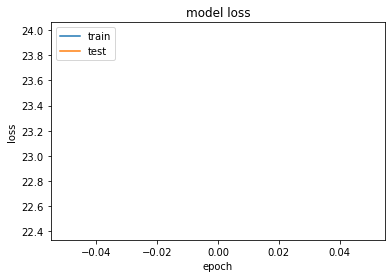

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#Evaluating Model
score  = model.evaluate_generator(test,steps = 100)
#printAccuracy
print("Accuracyloss:-", score[0])
print("AccuracyScore",score[1] )

Accuracyloss:- 22.42615312576294
AccuracyScore 0.21403453


In [10]:
import os
model.save(os.getcwd()+"//"+"weights_new.h5")

In [11]:
Y_pred = model.predict_generator(test, 1000 //64+1)
print(Y_pred)

[[0.00173729 0.00413547 0.002242   ... 0.00124231 0.00141639 0.00121225]
 [0.00317849 0.0077673  0.01434304 ... 0.01517121 0.00556196 0.0038336 ]
 [0.01405204 0.00771254 0.0149821  ... 0.00420249 0.01701608 0.0011478 ]
 ...
 [0.00956559 0.00285359 0.04434862 ... 0.01181081 0.014014   0.00654804]
 [0.0025911  0.00551166 0.01242759 ... 0.0155671  0.00347924 0.00681466]
 [0.00221547 0.00174592 0.00105375 ... 0.01692559 0.00509053 0.01081341]]


In [12]:
import numpy as np
y_pred = np.argmax(Y_pred, axis=1)

#len(y_pred)

print("Validation ", len(test.classes))

for i in range(len(test.classes)):
    pass
    #print(test.classes[i])

Validation  1000


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


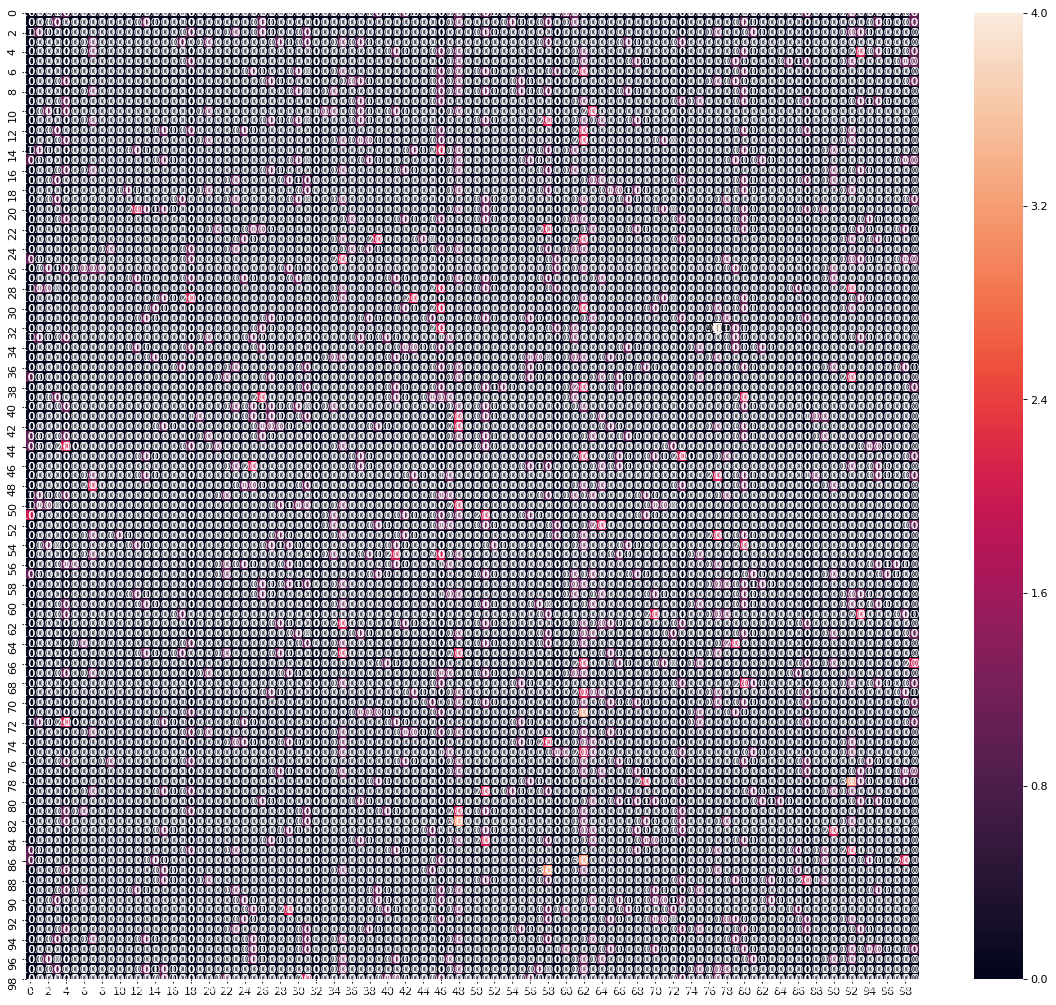

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test.classes, y_pred), fmt='.2f', annot=True))

In [15]:
print('Classification Report')
target_names = [str(x) for x in range(100)]
print(classification_report(test.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.08      0.10      0.09        10
          16       0.00      0.00      0.00        10
     

In [38]:
from tensorflow.keras.models import Model
from PIL import Image
layer_outputs = [layer.output for layer in model.layers[:len(model.layers)]]
#image = cv2.imread("002_201.jpg")
activation_model = Model(inputs=model.input, outputs=layer_outputs)
im = Image.open("002_201.jpg") 
img = im.resize((48, 48))
img = img.save("predict_image.jpg")

In [39]:
image_show = Image.open("002_201.jpg")
image_show.show()

In [41]:
pred_img = image.load_img("predict_image.jpg",target_size=(48, 48))
data_batch = np.asarray(pred_img).reshape((-1, 48, 48,3 )).astype(float)
activations = activation_model.predict(data_batch)

In [60]:
final_img = cv2.imread("predict_image.jpg")

final_img = np.asarray(final_img).reshape((-1, 48, 48,3 )).astype(float)
final_pred = model.predict(final_img)

In [61]:
print("Test image Probabilites...........")
#print(final_pred)
test_image = final_pred.argmax(axis=-1)
test_image

Test image Probabilites...........


array([67], dtype=int64)

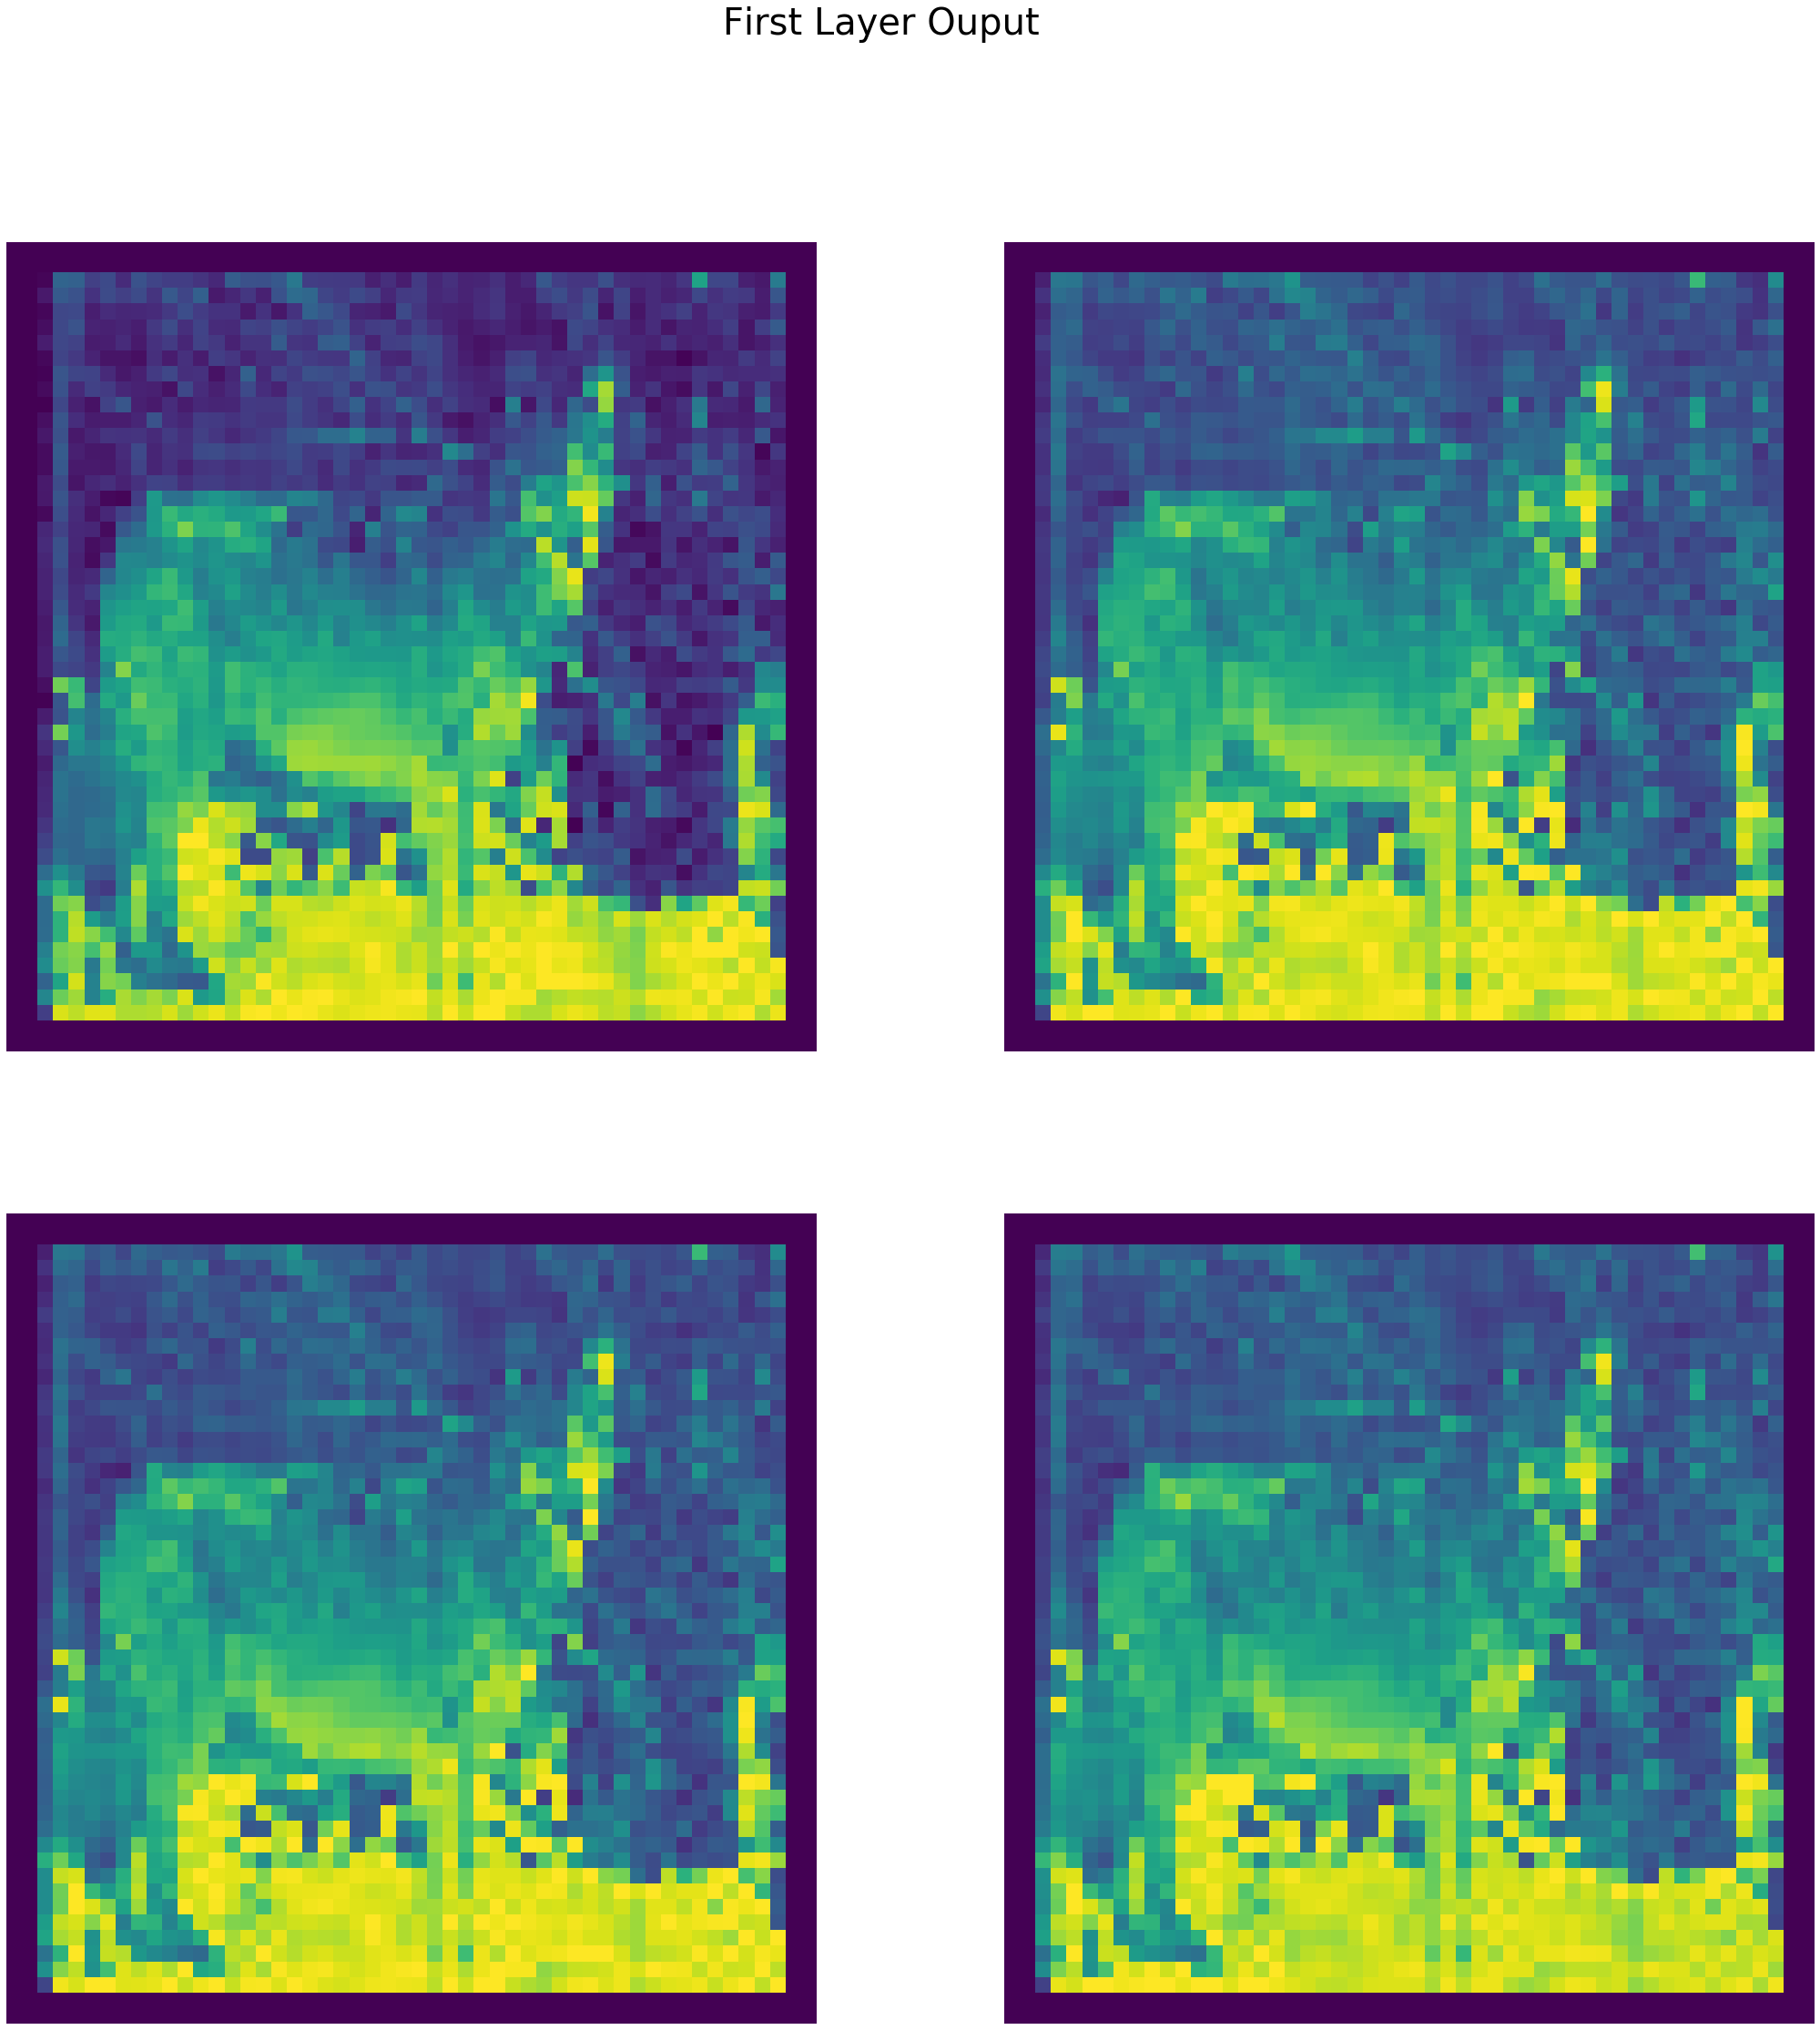

In [67]:
fig,ax=plt.subplots(2,2,figsize=(36,36))
for i in range(2):
    for j in range(2):
        #print("j=========", j)
        #print("i+j========", i+j)
        if (i+j)<32:
            first_layer_activation = activations[0]
            ax[i][j].imshow(first_layer_activation[0,:,:,i+j],)
            ax[i][j].axis("off")
        else:
            ax[i][j].set_visible(False)

plt.suptitle("First Layer Ouput",fontsize=40)
plt.show()

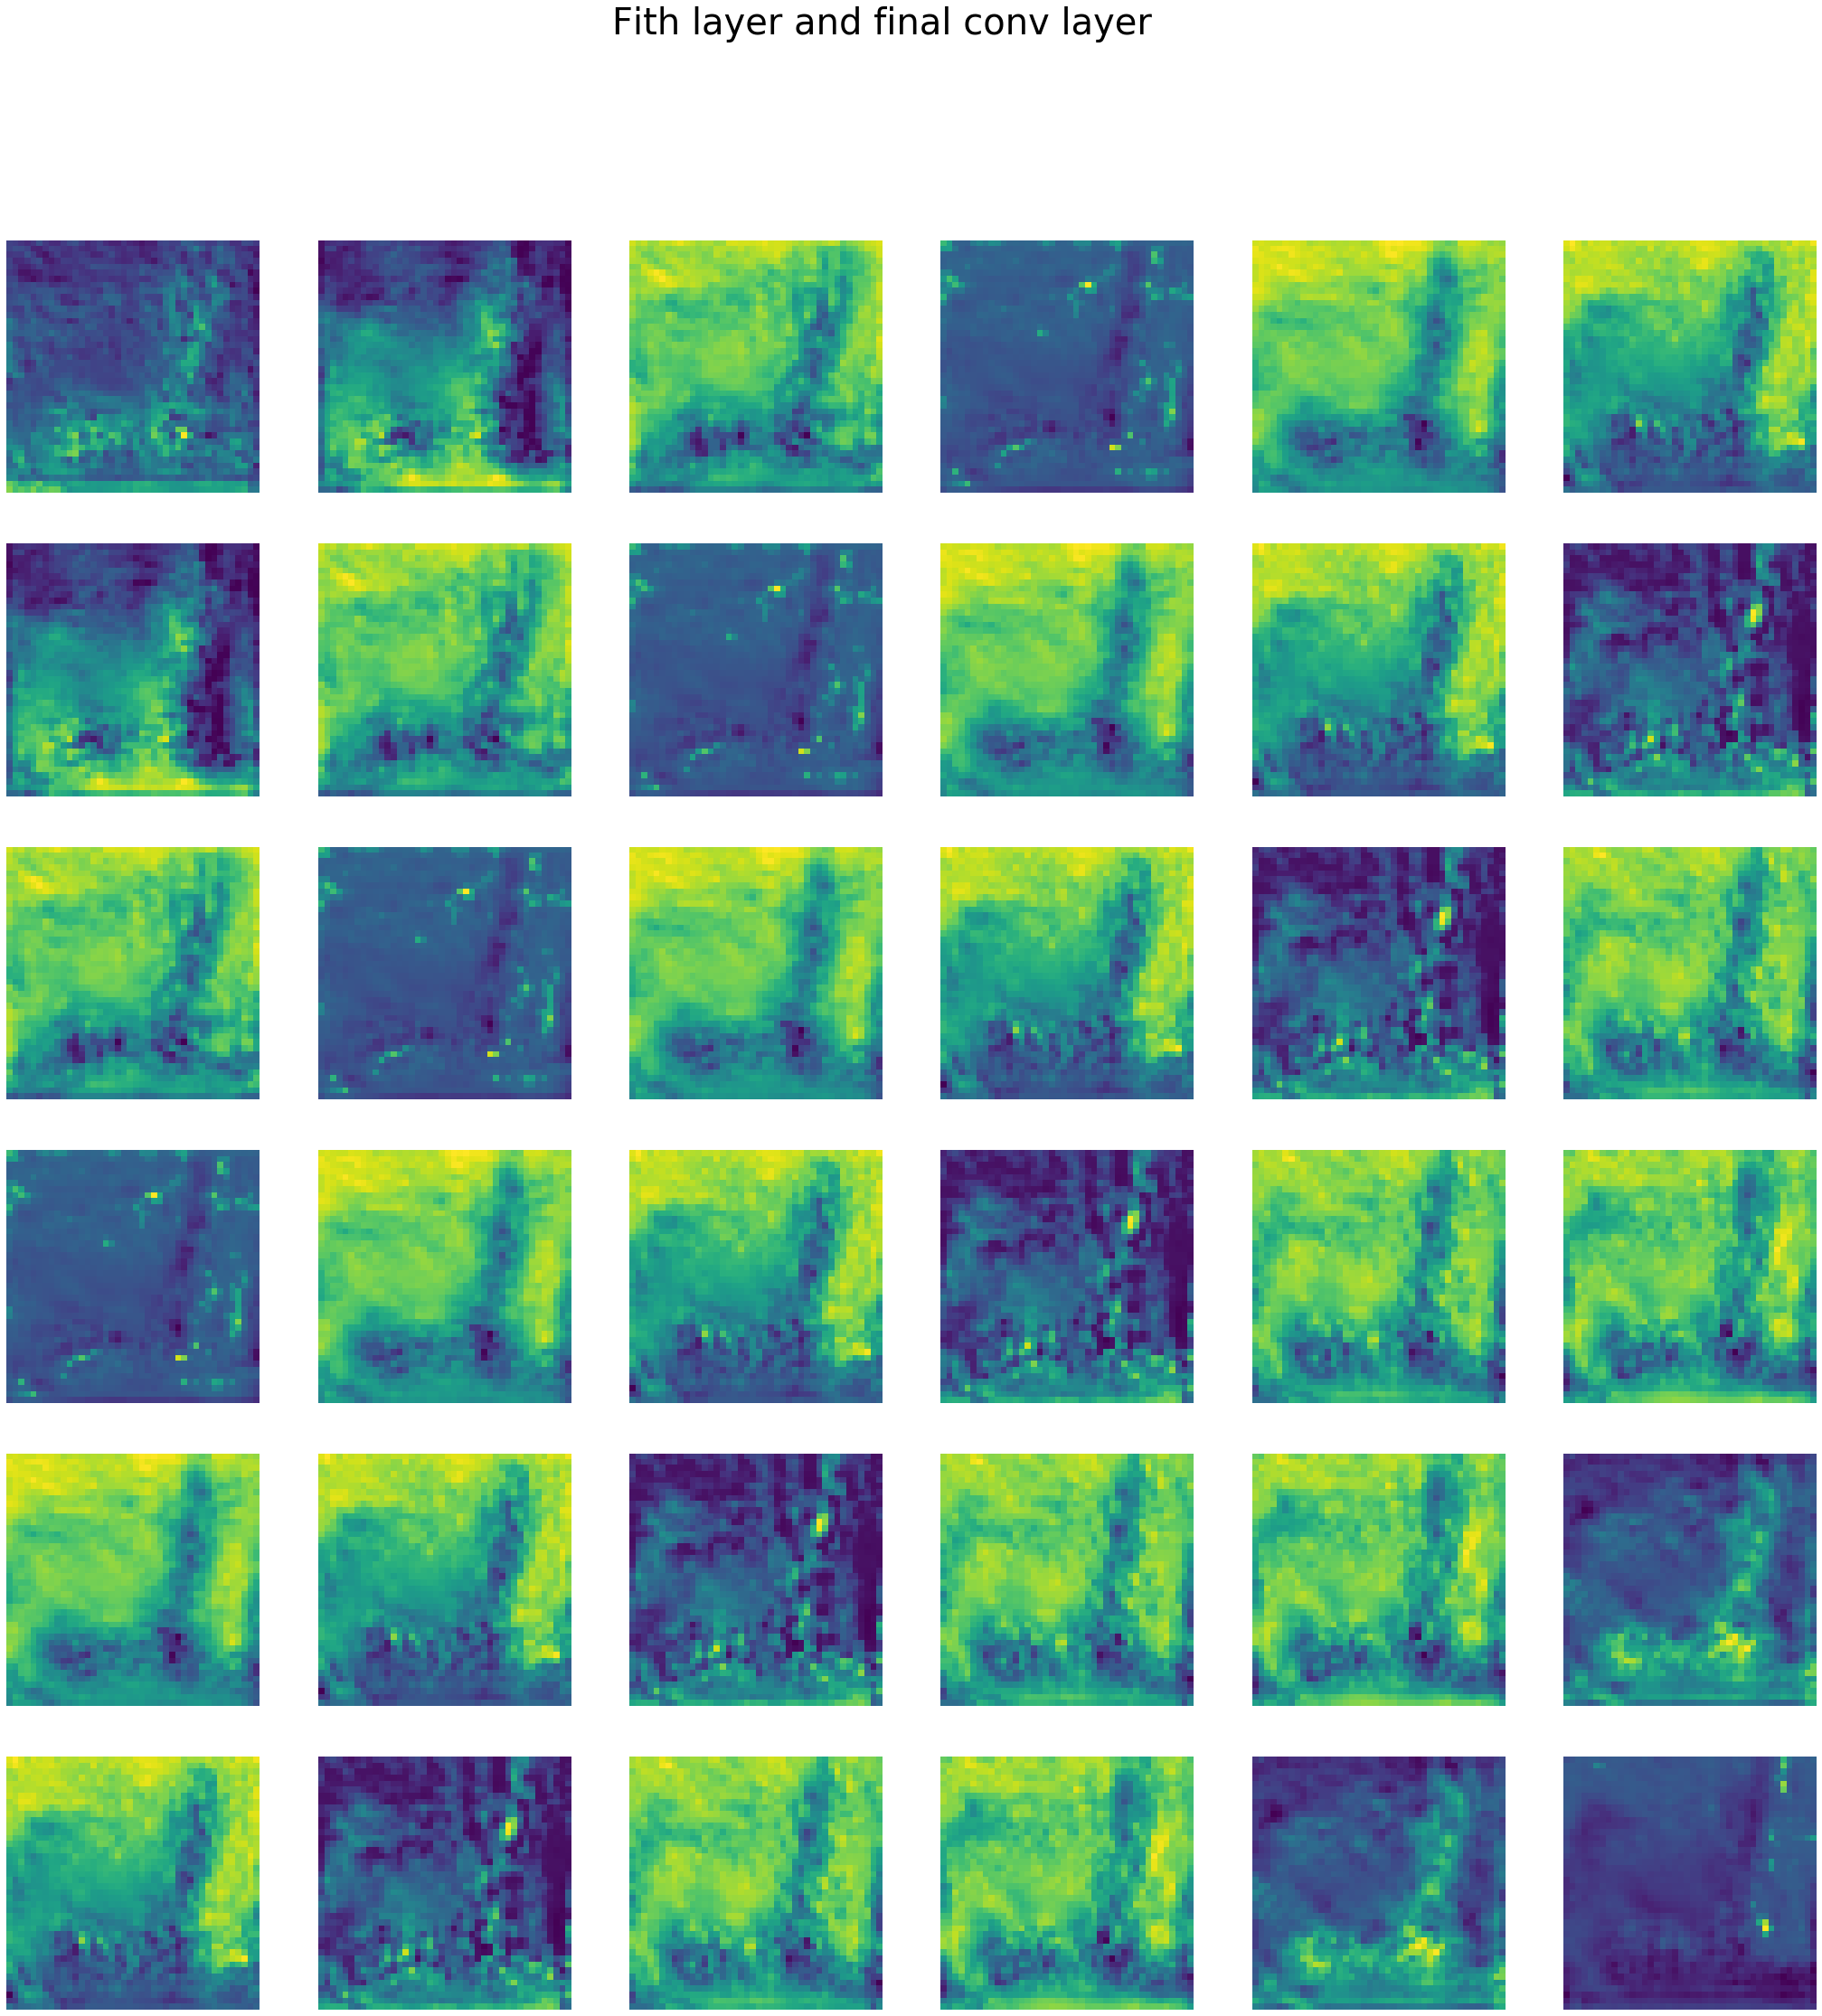

In [77]:
fig,ax=plt.subplots(6,6,figsize=(36,36))
for i in range(6):
    for j in range(6):
        #print("j=========", j)
        #print("i+j========", i+j)
        if (i+j)<32:
            first_layer_activation = activations[-6]
            ax[i][j].imshow(first_layer_activation[0,:,:,i+j],)
            ax[i][j].axis("off")
        else:
            ax[i][j].set_visible(False)

plt.suptitle("Fifth layer and final conv layer",fontsize=40)
plt.show()

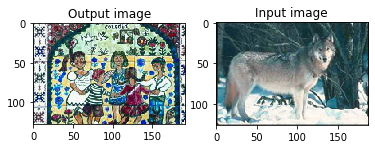

In [141]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
value = test_image[0]

path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val"
#path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val\67"
image = "002_201.jpg"
def image_check_output(path, val, image):
    ###HER WE NEED TO GIVE INPUT AS A MANUAL BY SEEING THE Output of the Model
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(6,8))
    #print(fig, ax)
    img = mpimg.imread(path+"\\"+str(val)+"\\"+"0067_6800.jpg")
    #print("Out put image...........")
    ax1.imshow(img)
    ax1.axis("on")
    ax1.title.set_text("Output image")
    
    image_in = mpimg.imread(image)
    #print("Input Image.............", image)
    ax2.imshow(image_in)
    ax2.axis("on")
    ax2.title.set_text("Input image")
    
image_check_output(path, value, image)

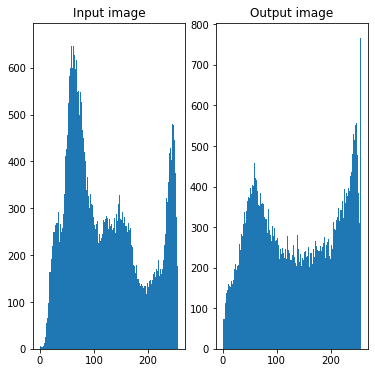

In [140]:
#Histograms for the images 
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val"

def final_hist(path):
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(6,6))
    
    img = cv2.imread('002_201.jpg',1)
    ax1.hist(img.ravel(),256,[0,256])
    ax1.axis("on")
    ax1.title.set_text("Input image")
        
    img2 = cv2.imread(path+"\\"+str(67)+"\\"+"0067_6800.jpg",1)
    ax2.hist(img2.ravel(),256,[0,256])
    ax2.axis("on")
    ax2.title.set_text("Output image")
        
final_hist(path)

##Here similarity image calculated by the input and the output of the image and there histograms